# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Import dataset

In [2]:
df = pd.read_csv('C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

## Check data imbalance

In [3]:
print('Number of unique values present to identify diabetes')
print(df['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Data split

In [4]:
dfs = {}  # Dictionary to hold DataFrames

for i in range(3):
    dfs[f'df_{i}'] = df[df['Diabetes_012'] == i]

In [5]:
from sklearn.model_selection import train_test_split
train_df_0, test_df_0 = train_test_split(dfs['df_0'], test_size=0.2)
train_df_1, test_df_1 = train_test_split(dfs['df_1'], test_size=0.2)
train_df_2, test_df_2 = train_test_split(dfs['df_2'], test_size=0.2)

In [6]:
train_combined = pd.concat([train_df_0, train_df_1, train_df_2], ignore_index=True)
test_combined = pd.concat([test_df_0, test_df_1, test_df_2], ignore_index=True)

In [7]:
print(train_combined['Diabetes_012'].value_counts())

Diabetes_012
0.0    170962
2.0     28276
1.0      3704
Name: count, dtype: int64


In [8]:
print(test_combined['Diabetes_012'].value_counts())

Diabetes_012
0.0    42741
2.0     7070
1.0      927
Name: count, dtype: int64


# Smote oversampling

In [9]:
from imblearn.over_sampling import SMOTE
target_variable = 'Diabetes_012'


class_distribution = train_combined[target_variable].value_counts()
print("Class Distribution:")
print(class_distribution)



X = train_combined.drop(columns=[target_variable])
y = train_combined[target_variable]

desired_samples = {0: 170962, 1: 170962, 2: 170962}
smote = SMOTE(sampling_strategy=desired_samples, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_variable])], axis=1)

print("Oversampled Class Distribution:")
print(df_oversampled[target_variable].value_counts())

Class Distribution:
Diabetes_012
0.0    170962
2.0     28276
1.0      3704
Name: count, dtype: int64
Oversampled Class Distribution:
Diabetes_012
0.0    170962
1.0    170962
2.0    170962
Name: count, dtype: int64


# Random Forest classification

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=0)

# Predict test result

In [11]:
X_test = test_combined.drop(columns=[target_variable])
y_test = test_combined[target_variable]

In [12]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

[[40915    63  1763]
 [  789     1   137]
 [ 5475    12  1583]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     42741
         1.0       0.01      0.00      0.00       927
         2.0       0.45      0.22      0.30      7070

    accuracy                           0.84     50738
   macro avg       0.44      0.39      0.40     50738
weighted avg       0.79      0.84      0.81     50738



# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

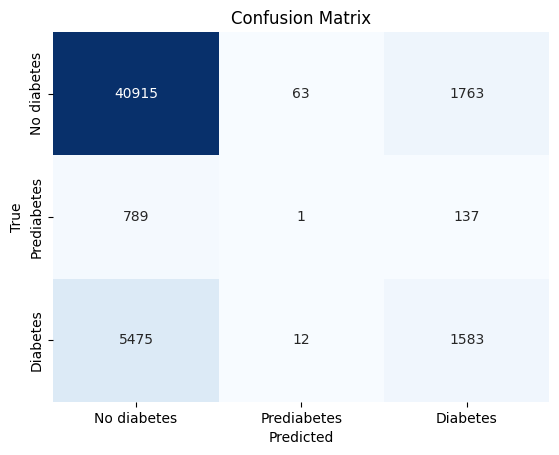

In [14]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

Random Forest Feature Importances: {'HighBP': 0.08789358365632755, 'HighChol': 0.07715417896317071, 'CholCheck': 0.0032049097561120234, 'BMI': 0.1137087612152193, 'Smoker': 0.04386866364892914, 'Stroke': 0.011357901310114776, 'HeartDiseaseorAttack': 0.024097019382458926, 'PhysActivity': 0.03580265148279688, 'Fruits': 0.03904921706796528, 'Veggies': 0.028479833379361743, 'HvyAlcoholConsump': 0.011430123067192828, 'AnyHealthcare': 0.00794063825863427, 'NoDocbcCost': 0.01628604437487171, 'GenHlth': 0.10070819828805032, 'MentHlth': 0.03982447013049825, 'PhysHlth': 0.04886564592952761, 'DiffWalk': 0.03212335702790401, 'Sex': 0.04254424664825617, 'Age': 0.0970932237035349, 'Education': 0.06230260323134539, 'Income': 0.07626472947772817}


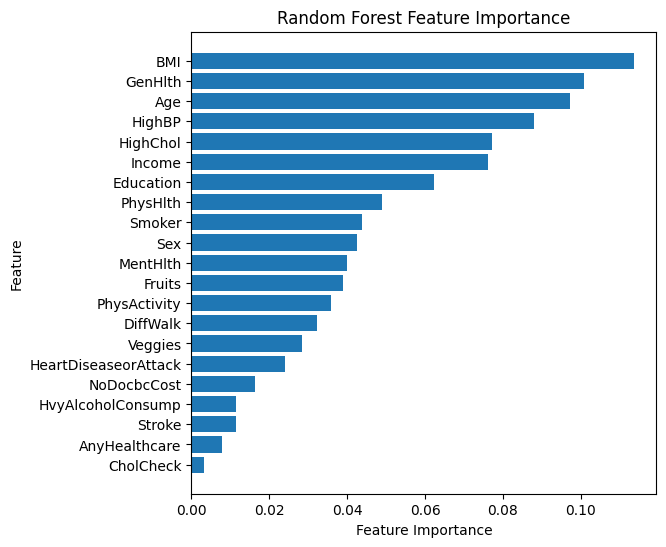

CholCheck: 0.0032049097561120234
AnyHealthcare: 0.00794063825863427
Stroke: 0.011357901310114776
HvyAlcoholConsump: 0.011430123067192828
NoDocbcCost: 0.01628604437487171
HeartDiseaseorAttack: 0.024097019382458926
Veggies: 0.028479833379361743
DiffWalk: 0.03212335702790401
PhysActivity: 0.03580265148279688
Fruits: 0.03904921706796528
MentHlth: 0.03982447013049825
Sex: 0.04254424664825617
Smoker: 0.04386866364892914
PhysHlth: 0.04886564592952761
Education: 0.06230260323134539
Income: 0.07626472947772817
HighChol: 0.07715417896317071
HighBP: 0.08789358365632755
Age: 0.0970932237035349
GenHlth: 0.10070819828805032
BMI: 0.1137087612152193


In [15]:
feature_importances = classifier.feature_importances_
feature_importances_rf = dict(zip(X_test.columns, classifier.feature_importances_))
print(f'Random Forest Feature Importances: {feature_importances_rf}')
feature_names = list(X_test.columns)
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()
for i in sorted_idx:
    print(f'{feature_names[i]}: {classifier.feature_importances_[i]}')